Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.92      0.94       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



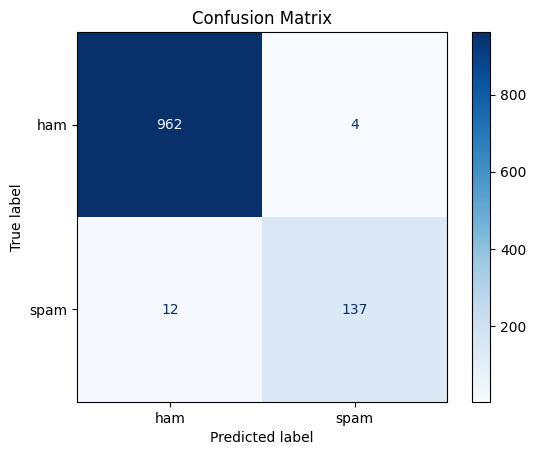

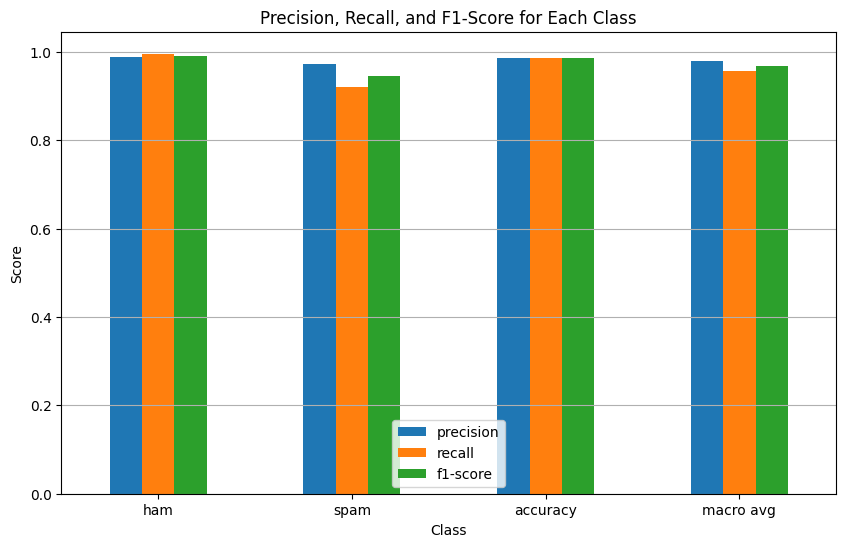

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import StackingClassifier

# Load the dataset
data_path = "/kaggle/input/sms-spam-collection-dataset/spam.csv"  # Replace with your dataset path
data = pd.read_csv(data_path, encoding='latin-1')

# Clean the dataset
data = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})

# Encode the labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['message']).toarray()
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Base Models
base_models = [
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define Meta Model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the Model
y_pred = stacking_clf.predict(X_test)
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_report_result)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Visualize Evaluation Metrics
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, F1-Score
metrics_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.ylabel("Score")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
